<a href="https://colab.research.google.com/github/himanshu530/dog_breed_classifier/blob/master/dog_breed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

# Brief Introduction


Multi class image classifier using tensorflow and tensorflow Hub

Basic tensorflow workflow:
1. Get the data ready into tensors
2. Pick a model
3. Fit the data to model and predict
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained work

1. Problem : Classify the images of dogs into breeds.
2. Data : Data is imported from kaggle dog breed identifier competition
3. Evaluation Metrics : Prediction probabilties with each dog breed
4. Features: Dataset contains images(unstructured data) , so it is best we use deep learning/transfer learning.
 It contains 120 breeds of dogs(i.e. 120 different classes).

In [2]:
# Import tensorflow into colab, Import tensorflowhub, Use a GPU
import tensorflow as tf
print("Tensorflow version :", tf.__version__)

Tensorflow version : 2.2.0


In [3]:
import tensorflow_hub as hub
print("Tf Hub version", hub.__version__)

# check for gpu availability

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "Not available")

Tf Hub version 0.8.0
GPU available


### Getting the data ready into tensors. Data must be in numerical form

In [4]:
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     ef3dc6a3af2210c9cc59e2bbdc9e9ae1  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


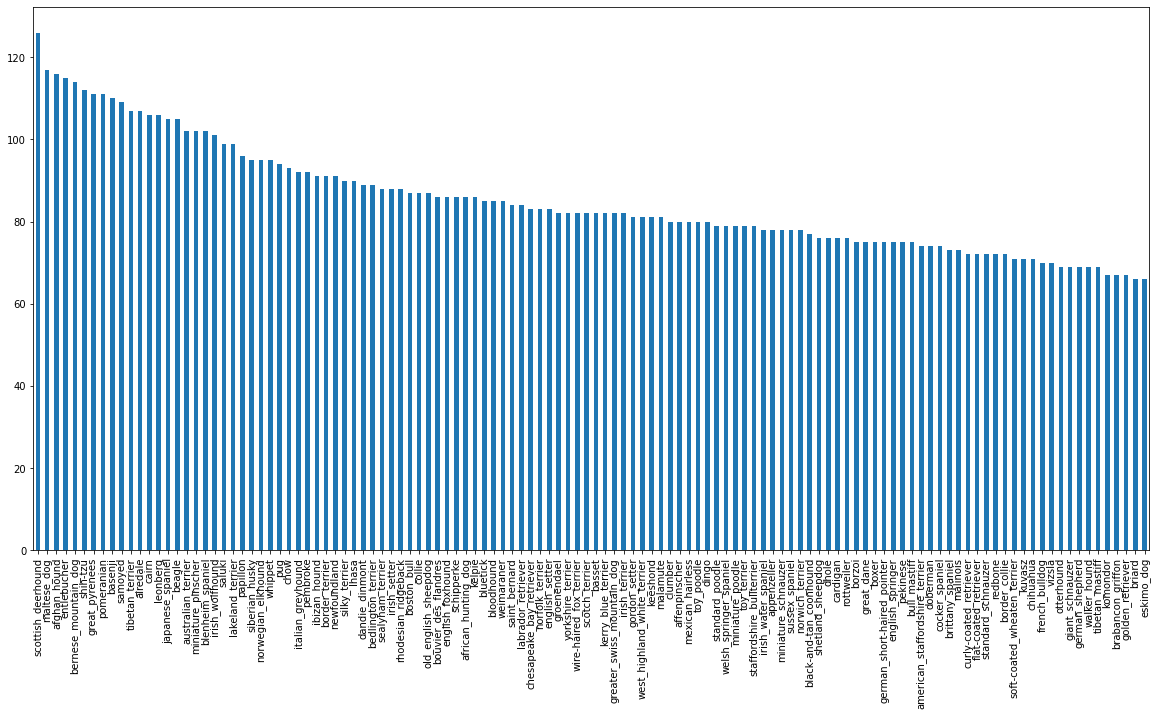

In [6]:
# How many images of each breed
labels_csv["breed"].value_counts().plot.bar(figsize =(20,10) )

In [7]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

In [8]:
labels_csv["breed"].value_counts().median()

82.0

In [0]:
# Preparing the images

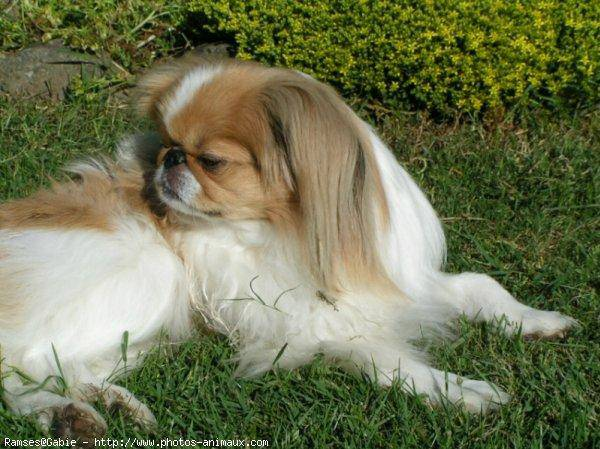

In [9]:
from IPython.display import Image
Image("drive/My Drive/Dog Vision/test/000621fb3cbb32d8935728e48679680e.jpg")

## Getting images and their labels from Drive


In [14]:
filenames = ["drive/My Drive/Dog Vision/train/"+ fname +".jpg" for fname in labels_csv["id"]]
filenames[:5]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

## Check whether no. of file names matches the actual amount of data

In [17]:
import os 
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Match")
else:
  print("Do not match")

Match


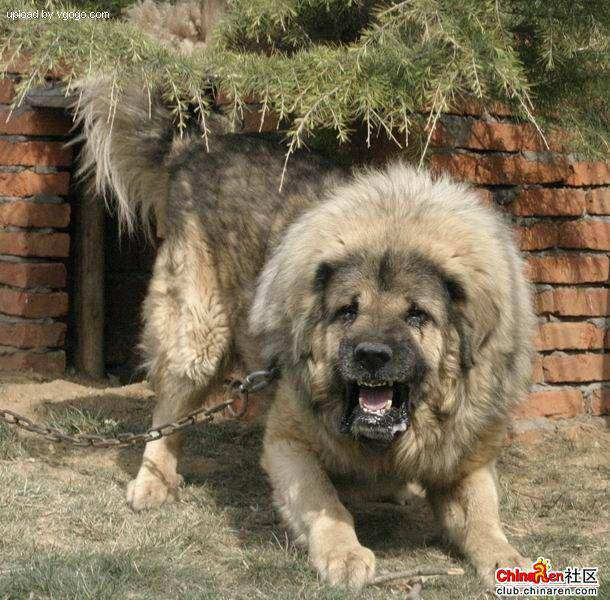

In [20]:
Image(filenames[9000])

### Turning data labels into numbers

In [21]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [22]:
len(labels)

10222

In [24]:
#checking for missing data
if len(labels)==len(filenames):
  print("Match")
else:
  print("Not a Match")

Match


In [26]:
#Find unique labels in the labels
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [27]:
len(unique_breeds)

120

In [29]:
#Turn a single label into array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
#Turn every label into boolean values
boolean_labels = [label==unique_breeds for label in labels]
boolean_labels

In [32]:
len(boolean_labels)

10222

In [33]:
type(boolean_labels)

list

In [35]:
#Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].astype(int))

#occurs at the nineteenth index

boston_bull
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
# Creating the validation set